# 비선형(non-linear) 회귀(regression)

- 실제 데이터들은 선형 모형으로 적합하지 않을 가능성이 훨씬 더 높다. 
- 비선형의 가장 큰 문제는 정확도가 그리 높지 않다는 것이다. 

## 데이터 만들기 

$$
    f(x) = x^2 + 4x + 6
$$
<br>
$$
    f(x) = ax^2 + bx + c
$$

- 이 함수를 사용해서 가상의 데이터를 가정해보자. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize # scipy에서 제공하는 최적화 함수

In [5]:
def f(x):
    return x ** 2 + 4 * x + 6

In [38]:
x = np.linspace(-20, 60, 50)
fx = f(x)

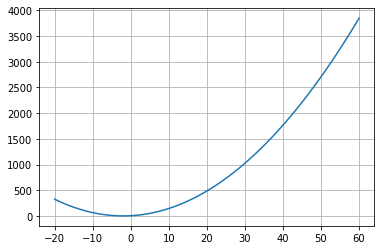

In [39]:
plt.plot(x, fx)
plt.grid()
plt.show()

In [40]:
np.random.seed(3)
y = fx + 500 * np.random.rand(len(x))

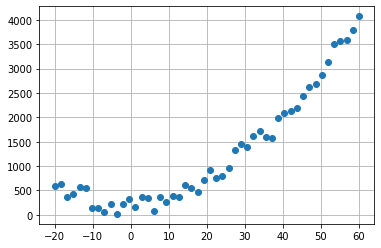

In [41]:
plt.plot(x, y, 'o')
plt.grid()
plt.show()

## loss function

- MSE(Mean Squared Error)

$$
    loss(w) = \frac{1}{N} \sum_{i=1}^N | w_0x_i^2 + w_1x_i + w_2 - y_i | ^ 2
$$

In [44]:
def loss(w):
    return np.mean((w[0] * x ** 2 + w[1] * x + w[2] - y) ** 2)

In [45]:
w0 = [0, 0, 0]
ret = minimize(loss, w0)

In [55]:
w = ret.x
print(w)
y_predict = w[0] * x ** 2 + w[1] * x + w[2]

[  0.99112922   4.46803927 238.98562548]


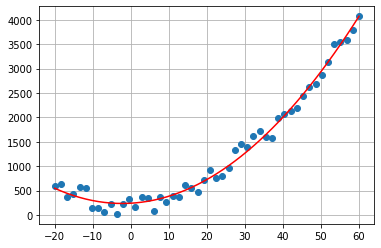

In [56]:
plt.plot(x, y, 'o')
plt.plot(x, y_predict, 'r-')
plt.grid()
plt.show()

## 이런 샘플은 어떨지 생각해 봅시다

$$
    y = \sin(2\pi x)
$$

- 이런 함수를 가정해서 샘플을 만들어 본거에요 

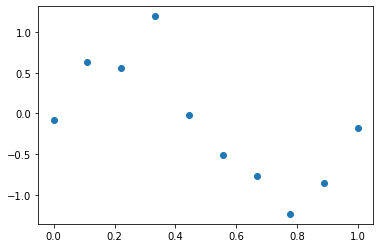

In [5]:
np.random.seed(2)

x = np.linspace(0, 1, 100)
t = np.sin(2*np.pi*x)

N = 10
x_train = np.linspace(0, 1, N)
t_train = np.sin(2*np.pi*x_train) + (np.random.randn(N)/5)

Noise = 100
x_noise = np.linspace(0, 1, Noise)
t_noise = np.sin(2*np.pi*x_noise) + (np.random.randn(Noise)/5)
                                     
# plt.plot(x, t, '--')
plt.plot(x_train, t_train, 'o')
# plt.plot(x_noise, t_noise, 'o', alpha=0.5)
plt.show()

## 선형 모델의 적용(linear regression)
- 주어진 데이터가 선형적인 관계가 있을것으로 가정(hypothesis)
- 주어진 데이터의 함수를 찾는게 너무 어려워서... 
- 일단 함수를 가정 해놓으면 모수를 찾는 문제로 바꿀 수 있으니깐 쉬워져요... 

- 준비된 학습 데이터를 잘 표현하는 `직선`을 찾는다면 다음과 같은 함수로 가정하고 시작할 수 있다. 

$$
    y = \beta_0 + \beta_1 x \\
$$

- 1이 생략된 형태이므로 다음과 같이 표현이 가능 

$$
    y = \beta_0 \cdot 1 + \beta_1 \cdot x
$$

- 그래서 벡터 표현으로 바꾼다면 다음과 같을 것이다. 

$$
    y = \beta_0 \cdot 1 + \beta_1 \cdot x = [\beta_0, \beta_1] \cdot \begin{bmatrix} 1 \\ x \end{bmatrix} = \beta^T \cdot x
$$

In [6]:
def loss(beta):
    return np.mean((beta[0] + beta[1] * x - t) ** 2)

In [12]:
w0 = [0, 0]
ret = minimize(loss, w0)

In [14]:
beta = ret.x
print(beta)
y_predict = beta[0] + beta[1] * x

[ 0.92634932 -1.85269859]


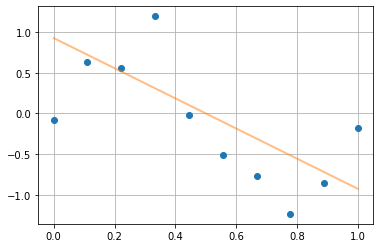

In [15]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, beta[0] + beta[1] * x, alpha=0.5, lw=2)
plt.grid()
plt.show()

## 비선형 회귀(non-linear) 회귀(regression)

- 위에서처럼 직선으로는 주어진 데이터를 잘 설명하지 못하는 것 처럼 보인다. 
- 그럼 이제 곡선을 사용하자 라는 거죠!
- 다항식을 사용할 수 있는데, 이 다항식이 sin() 처럼 비슷해지기를 바라는 상황(다항회귀)
- 즉, 주어진 데이터가 다항식과 비슷하지 않을까? (가설)

- 우리가 만들 수 있는 다항식은 다음과 같다. 
$$
    y(x,\beta) = \beta_0 + \beta_1x^1 + \beta_2x^2 + \cdots + \beta_nx^n
$$

- 어떤 형태의 다항함수를 쓸 것인가?
- 항을 몇개를 쓸거고, 차수는 얼마로 선택할 것인가? ... 

## numpy의 라이브러리를 이용하여 문제 풀기

- 수학적으로는 자료의 갯수가 n개라고 했을 때, 
- n-1차항을 사용하면 주어진 자료를 완벽히 설명할 수 있는 유일한 함수의 존재성은 이미 잘 알려져 있다. 

In [44]:
coef = np.polyfit(x_train, t_train, 4)
non_lin = np.poly1d(coef)

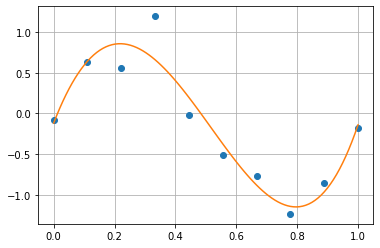

In [45]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, non_lin(x))
plt.grid()
plt.show()

## 수학적으로 데이터의 갯수가 n일 때, n-1차식을 이용하여 주어진 데이터를 정확히 표현할 수 있는 함수의 존재는 증명이 되었다. 

### 아이스크림 문제에 비선형 회귀 적용해보기 

In [4]:
x = np.array([20,21,22,23,24])
y = np.array([15,16,21,33,42])

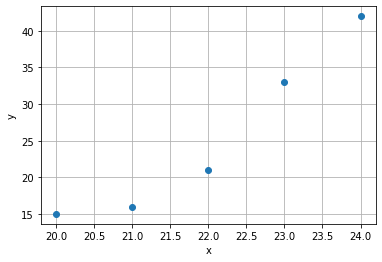

In [7]:
plt.plot(x,y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## loss function

- MSE(Mean Squared Error)

$$
    loss(\beta) = \frac{1}{N} \sum_{i=1}^N | \beta_0 + \beta_1x^1 + \beta_2x^2 + \beta_3x^3 - y_i | ^ 2
$$

In [35]:
def loss(w):
    return np.mean((w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3 + w[4] * x ** 4 - y) ** 2)

In [36]:
w0 = [0, 0, 0, 0, 0]
ret = minimize(loss, w0)

In [37]:
w = ret.x
print(w)
y_predict = w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3 + w[4] * x ** 4

[ 0.0153212   0.15138109  0.87557798 -0.08601011  0.00218154]


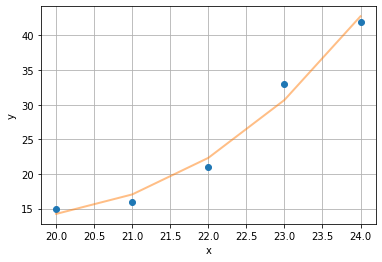

In [38]:
plt.plot(x,y, 'o')
plt.plot(x, y_predict, alpha=0.5, lw=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [27]:
# 1차 다항식
coef1 = np.polyfit(x, y, 1)
lin = np.poly1d(coef1)

In [29]:
lin.coefficients

array([   7.1, -130.8])

In [32]:
# n차 다항식
coef2 = np.polyfit(x, y, 4)
non_lin = np.poly1d(coef2)

In [39]:
non_lin.coefficients

array([-5.41666667e-01,  4.70833333e+01, -1.53045833e+03,  2.20549167e+04,
       -1.18900000e+05])

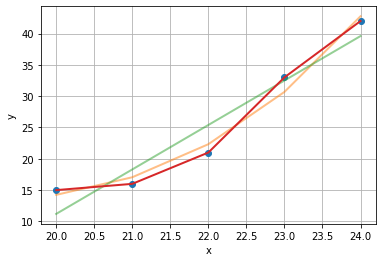

In [34]:
plt.plot(x,y, 'o')
plt.plot(x, y_predict, alpha=0.5, lw=2)
plt.plot(x, lin(x), alpha=0.5, lw=2)
plt.plot(x, non_lin(x), alpha=1, lw=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()